In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from tensorflow.keras.layers import *
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


I0000 00:00:1729857083.067042    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857083.276470    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857083.276530    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857083.695292    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857083.695459    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-25

True

In [2]:
df=pd.read_csv("Restaurant_Reviews.tsv",sep="\t")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
reviews = df['Review'].values
labels = df['Liked'].values

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 5000
max_length = 100
embedding_dim = 16

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/home/arnav_bhatia/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1729857301.442913    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857301.443323    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857301.443377    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729857301.445016    3049 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:172

In [8]:
history = model.fit(padded_sequences, labels, epochs=100, validation_split=0.2)


Epoch 1/100


2024-10-25 17:25:24.166463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5295 - loss: 0.6902 - val_accuracy: 0.2400 - val_loss: 0.7670
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5831 - loss: 0.6732 - val_accuracy: 0.2700 - val_loss: 0.7361
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6695 - loss: 0.6208 - val_accuracy: 0.5100 - val_loss: 0.6808
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8462 - loss: 0.3862 - val_accuracy: 0.8250 - val_loss: 0.4231
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9036 - loss: 0.2738 - val_accuracy: 0.5250 - val_loss: 0.9513
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7128 - loss: 0.5328 - val_accuracy: 0.6450 - val_loss: 0.6620
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7836 - loss: 0.4583 - val_accuracy: 0.7250 - val_loss: 0.5566
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8281 - loss: 0.3698 - val_accuracy: 0.6650 - val_l

In [9]:
def plot_curves(history):    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

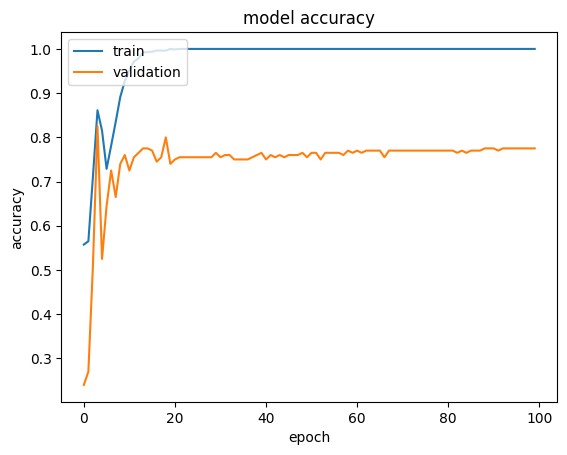

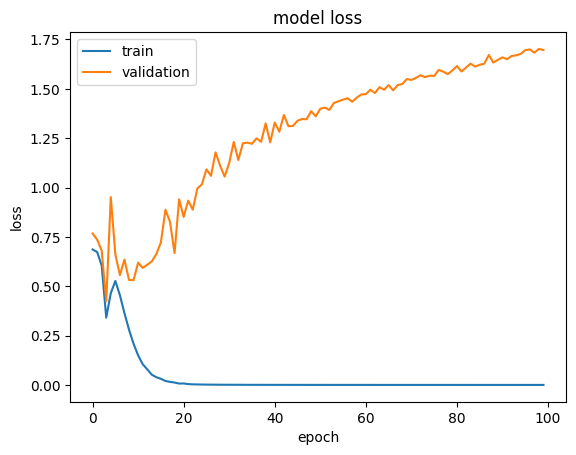

In [10]:
plot_curves(history)

In [11]:
model.save("nlp.keras")

In [12]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(padded_sequences, labels, verbose=2)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


32/32 - 1s - 17ms/step - accuracy: 0.9550 - loss: 0.3393
Loss: 0.33926481008529663
Accuracy: 0.9549999833106995


In [13]:
from sklearn.metrics import classification_report

# Get predictions
predictions = (model.predict(padded_sequences) > 0.5).astype("int32")

# Print classification report
print(classification_report(labels, predictions, target_names=["Negative", "Positive"]))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

    Negative       0.99      0.92      0.95       500
    Positive       0.93      0.99      0.96       500

    accuracy                           0.95      1000
   macro avg       0.96      0.96      0.95      1000
weighted avg       0.96      0.95      0.95      1000

